In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("Retail_Sales_data.csv")
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
data.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
unique_shopping_mall = data["shopping_mall"].unique()
unique_categories = data["category"].unique()


In [6]:
unique_shopping_mall

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [7]:
unique_categories


array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [8]:
transaction_count_by_shopping_mall = data["shopping_mall"].value_counts()

In [9]:
transaction_count_by_shopping_mall

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [10]:
relevant_columns = ["shopping_mall", "price", "category"]

sales_by_region = data.groupby("shopping_mall")["price"].sum()
sales_by_region


shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

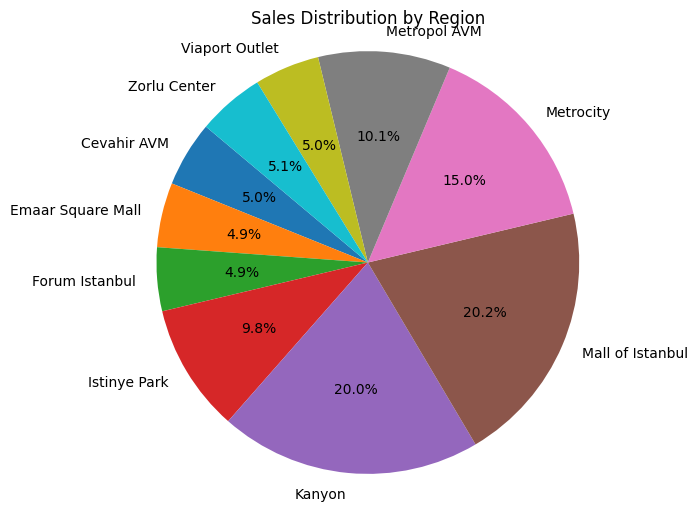

In [11]:
plt.figure(figsize=(6, 6))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct="%1.1f%%", startangle=140)
plt.title("Sales Distribution by Region")
plt.axis("equal")
plt.show()


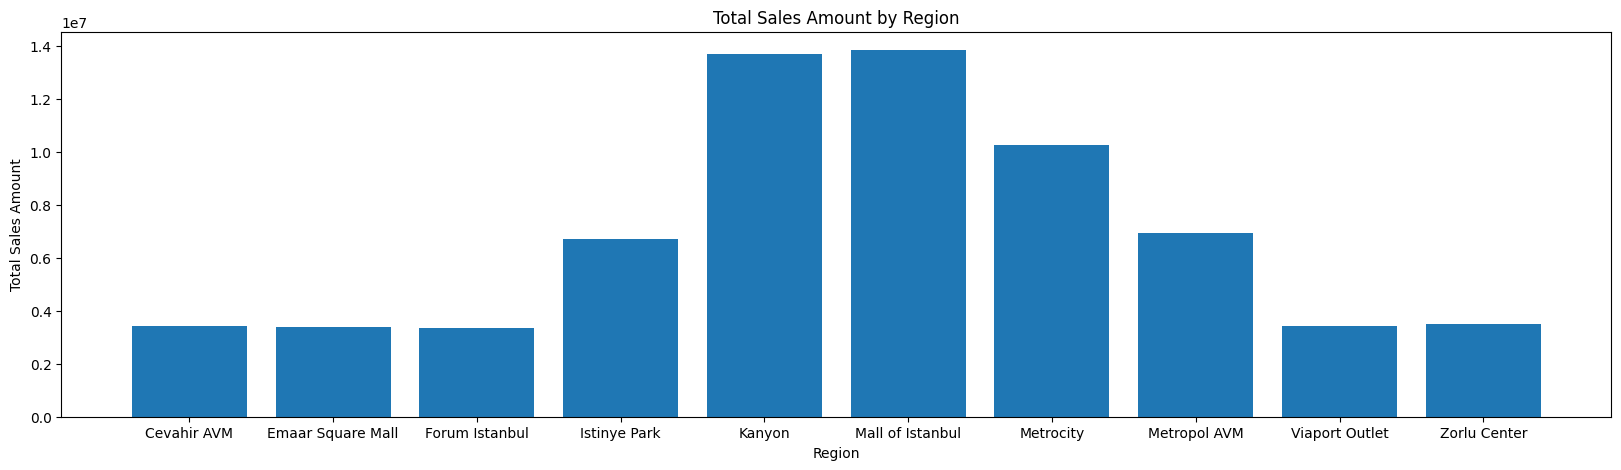

In [15]:
plt.figure(figsize=(20, 5))
plt.bar(sales_by_region.index, sales_by_region.values)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Region')
plt.show()


In [13]:
top_regions = sales_by_region.sort_values(ascending=False).head(5)
print("Top-performing regions:")
print(top_regions)

Top-performing regions:
shopping_mall
Mall of Istanbul    13851737.62
Kanyon              13710755.24
Metrocity           10249980.07
Metropol AVM         6937992.99
Istinye Park         6717077.54
Name: price, dtype: float64
